# Equations for a 3D printer in Delta configuration

In [1]:
from __future__ import division
from sympy import *
from sympy import symbols
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x, y, z = symbols('x y z')
h1, h2, h3, L, r = symbols('h1 h2 h3 L r')
init_printing()

The equations are given by

$$\begin{align}
&(x - L)^2 + y^2 + (z - h_1)^2 = r^2\\
&x^2 + (y - \sqrt{3}L)^2 + (z - h_2)^2 = r^2\\
&(x + L)^2 + y^2 + (z - h_3)^2 = r^2
\end{align}$$

being $(x,y,z)$ the coordinates of the _table_, $(h_1,h_2,h_3)$ the heights of the sliders, $2L$ the side of the triangle and $r$ the length of the bars.

We can divide the equations by $r^2$ to obtain

$$\begin{align}
&(x - L)^2 + y^2 + (z - h_1)^2 = 1\\
&x^2 + (y - \sqrt{3}L)^2 + (z - h_2)^2 = 1\\
&(x + L)^2 + y^2 + (z - h_3)^2 = 1
\end{align}$$

where the variables are normalized by $r^2$.

In [2]:
eq1 = (x - L)**2 + y**2 + (z - h1)**2 - 1
eq2 = x**2 + (y - sqrt(3)*L)**2 + (z - h2)**2 - 1
eq3 =(x + L)**2 + y**2 + (z - h3)**2 - 1

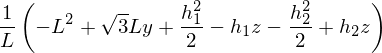

In [3]:
aux1 = simplify(solve(expand(eq1) - eq2, x)[0])
aux1

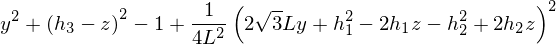

In [4]:
aux2 = simplify(eq3.subs(x, aux1))
aux2

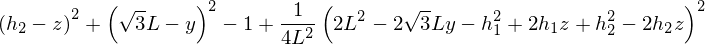

In [5]:
aux3 = simplify(eq2.subs(x, aux1))
aux3

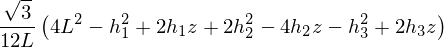

In [6]:
aux4 = solve(expand(aux2 - aux3), y)[0]
aux4

In [7]:
z_sol = solve(aux3.subs(y, aux4), z)[0]

In [8]:
y_sol = aux4.subs(z, z_sol)

In [9]:
x_sol = aux1.subs([(z, z_sol), (y, y_sol)])

# Trajectory determination

Let us suppose we want to follow a trajectory given by the curve

$$f(x,y,0) = 0$$

In [10]:
h1_sol = solve(eq1, h1)[1]
h1_sol

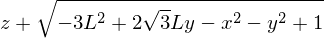

In [11]:
h2_sol = solve(eq2, h2)[1]
h2_sol

In [12]:
h3_sol = solve(eq3, h3)[1]
h3_sol

In [13]:
h1_num = lambdify((x, y, z, L), h1_sol, "numpy") 
h2_num = lambdify((x, y, z, L), h2_sol, "numpy") 
h3_num = lambdify((x, y, z, L), h3_sol, "numpy")

The height of an equilateral triangle is given by
$$h = \frac{\sqrt{3}}{2}a$$
and the radius of the inner circle is
$$r = \frac{h}{3} \enspace ,$$
$a$ is the length of the side.

In [14]:
%matplotlib inline

def plot_triangles(L):
    ax.plot([-L, -L], [0, 0], [0, 2], 'k', lw=2)
    ax.plot([L, L], [0, 0], [0, 2], 'k', lw=2)
    ax.plot([0, 0], [np.sqrt(3)*L, np.sqrt(3)*L], [0, 2], 'k', lw=2)
    ax.plot([-L, L], [0, 0], [0, 0], 'k--', lw=2)
    ax.plot([L, 0], [0, np.sqrt(3)*L], [0, 0], 'k--', lw=2)
    ax.plot([0, -L], [np.sqrt(3)*L, 0], [0, 0], 'k--', lw=2)

def plot_elements(L, h1, h2, h3, x, y, z):
    # Plot sliders
    ax.plot([-L], [0], [h1], 'or', ms=8)
    ax.plot([L], [0], [h2], 'or', ms=8)
    ax.plot([0], [np.sqrt(3)*L], [h3], 'or', ms=8)
    
    # Plot table
    ax.plot([x], [y], [z], 'ob', ms=8)
    
    # Plot bars
    ax.plot([-L, x], [0, y], [h1, z], 'c', lw=2)
    ax.plot([L, x], [0, y], [h2, z], 'c', lw=2)
    ax.plot([0, x], [np.sqrt(3)*L, y], [h3, z], 'c', lw=2)

## Circle in the plane

In [15]:
theta = np.linspace(0, 2*np.pi, 100)
x_vec = 0.3*np.cos(theta)
y_vec = 0.3*np.sin(theta) + np.sqrt(3)/3

In [16]:
h1_vec = h1_num(x_vec, y_vec, 0, 0.3)
h2_vec = h2_num(x_vec, y_vec, 0, 0.3)
h3_vec = h3_num(x_vec, y_vec, 0, 0.3)

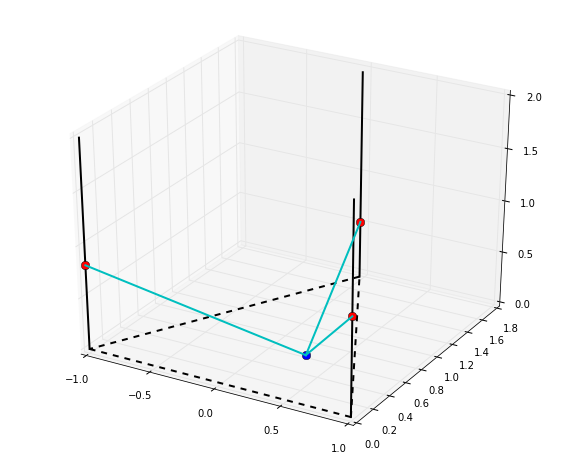

In [17]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
plot_triangles(1)
plot_elements(1, h1_vec[99], h2_vec[99], h3_vec[99], x_vec[99], y_vec[99], 0)
ax.auto_scale_xyz([-1, 1], [0, np.sqrt(3)], [0, 2])
plt.show()

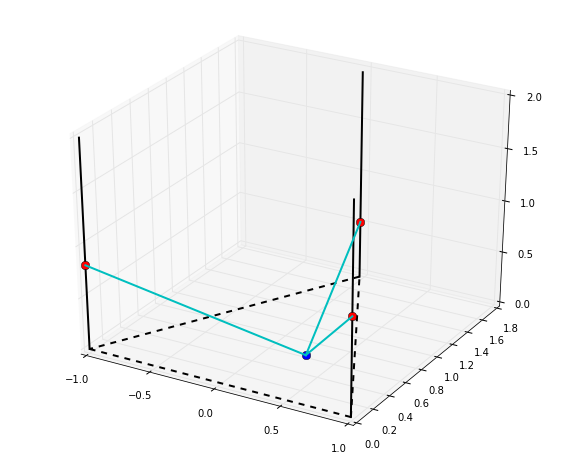

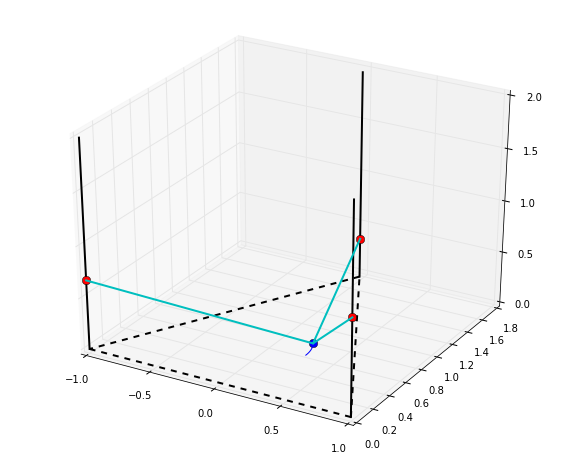

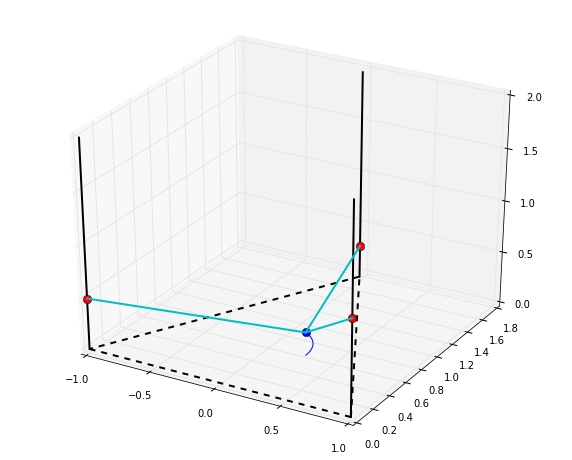

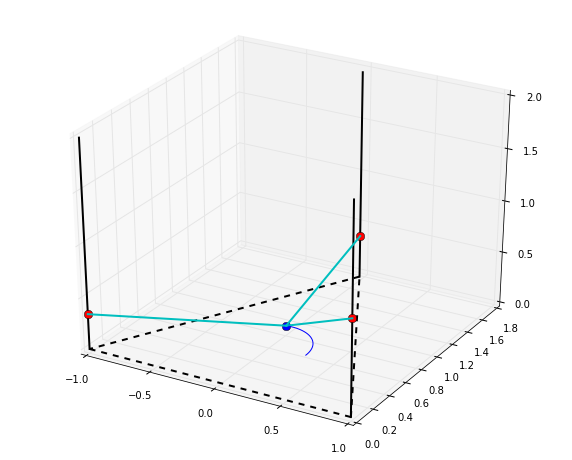

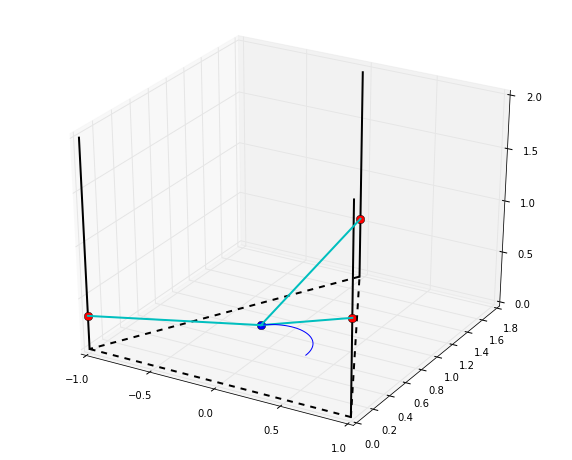

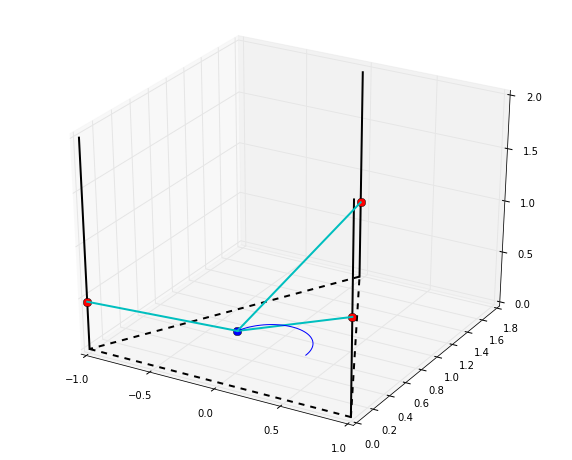

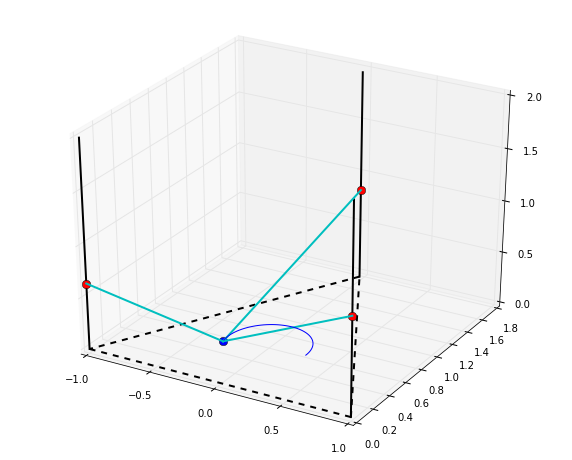

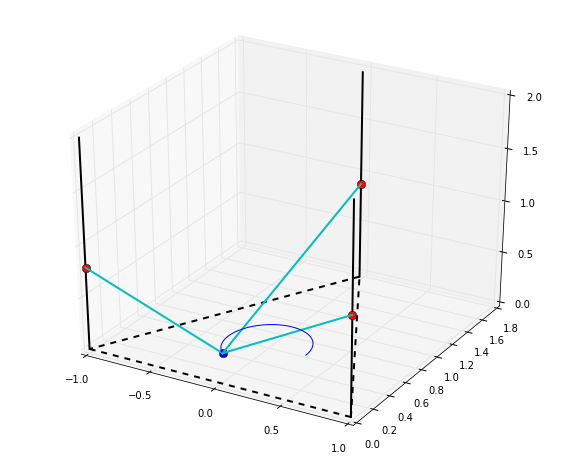

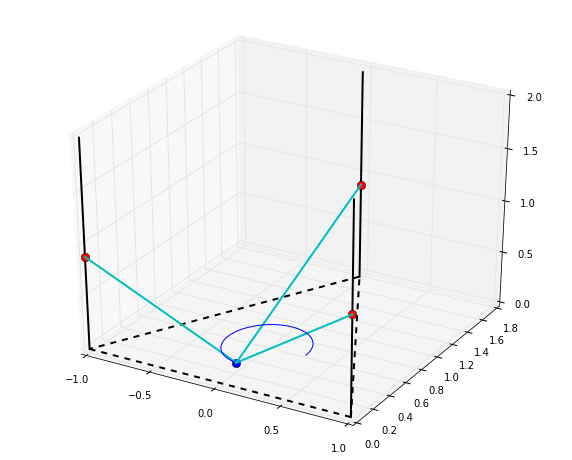

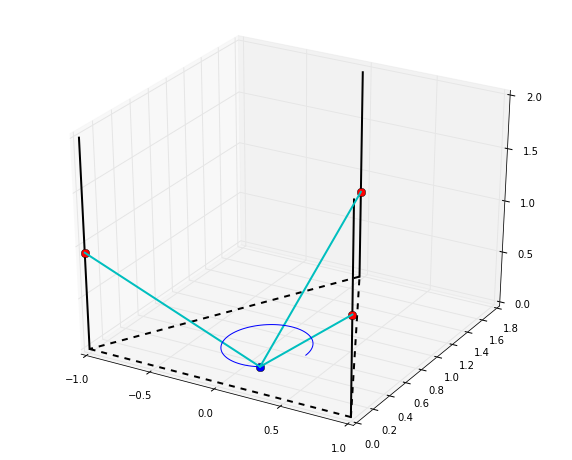

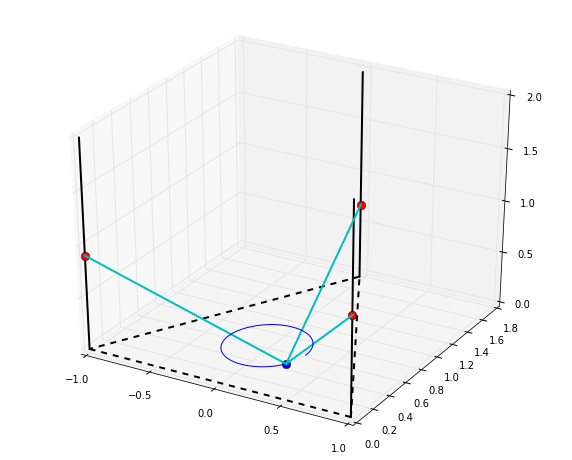

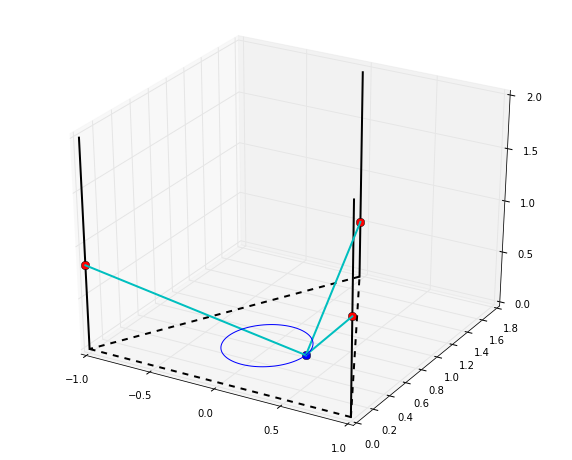

In [18]:
L = 1
for k in range(0,100,9):
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca(projection='3d')
    plot_triangles(L)
    plot_elements(L, h1_vec[k], h2_vec[k], h3_vec[k], x_vec[k], y_vec[k], 0)
    ax.plot(x_vec[0:k], y_vec[0:k], [0], 'b')
    ax.auto_scale_xyz([-1, 1], [0, np.sqrt(3)], [0, 2])
    
plt.show()

## Helix

In [19]:
theta = np.linspace(0, 8*np.pi, 400)
x_vec = 0.3*np.cos(theta)
y_vec = 0.3*np.sin(theta) + np.sqrt(3)/3
z_vec = theta/(8*np.pi)

In [20]:
h1_vec = h1_num(x_vec, y_vec, z_vec, 0.3)
h2_vec = h2_num(x_vec, y_vec, z_vec, 0.3)
h3_vec = h3_num(x_vec, y_vec, z_vec, 0.3)

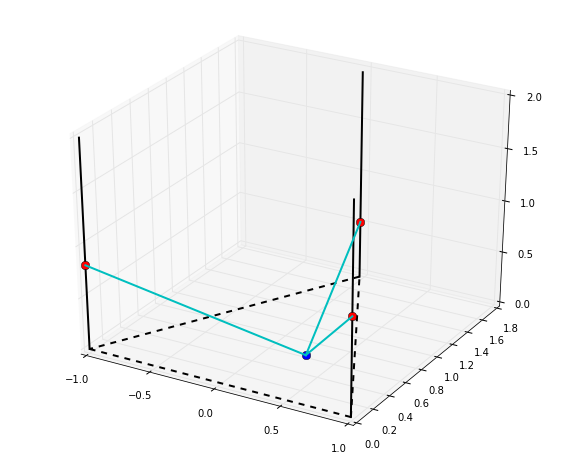

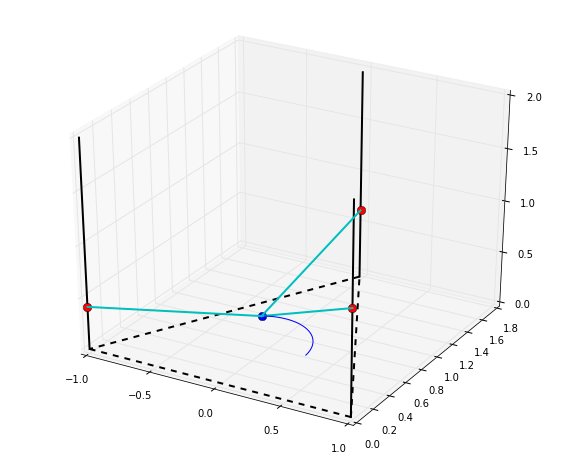

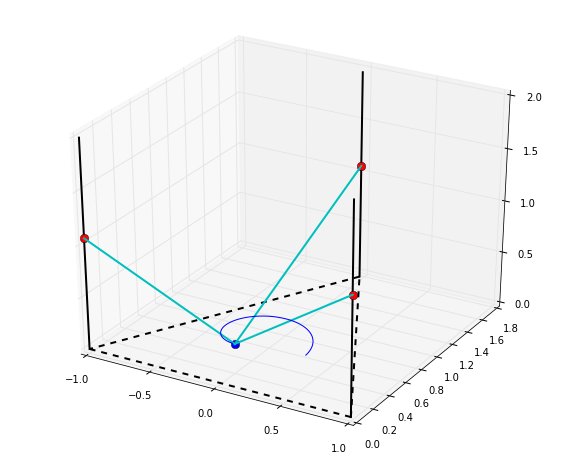

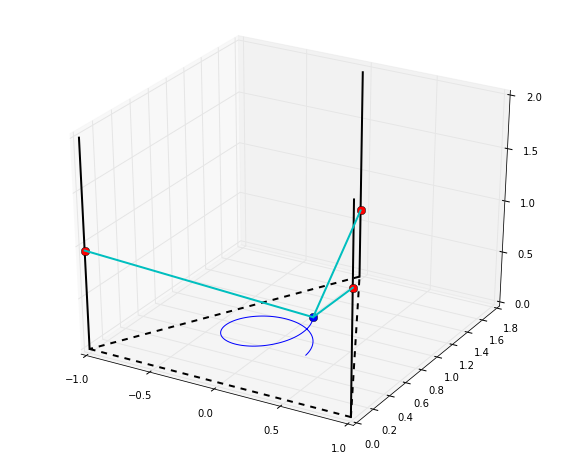

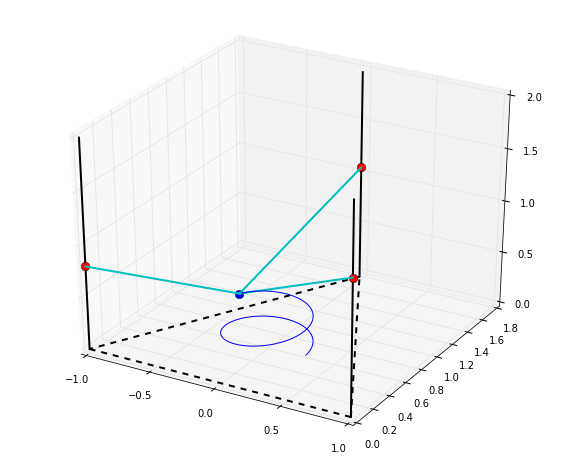

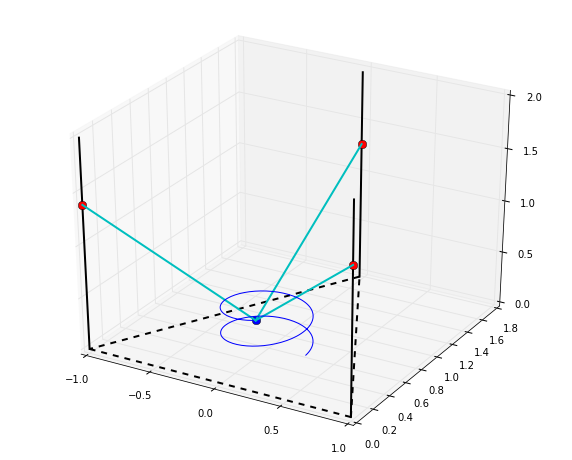

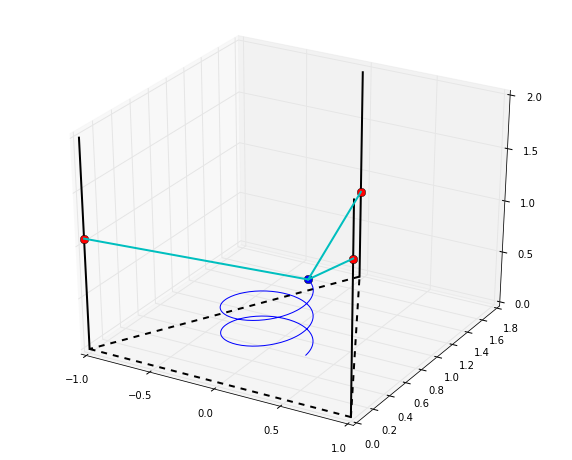

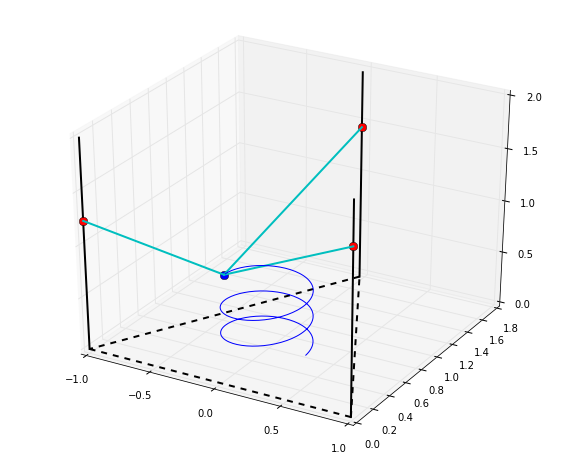

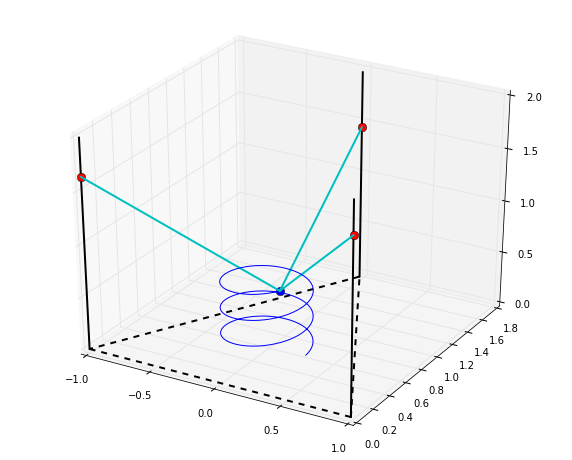

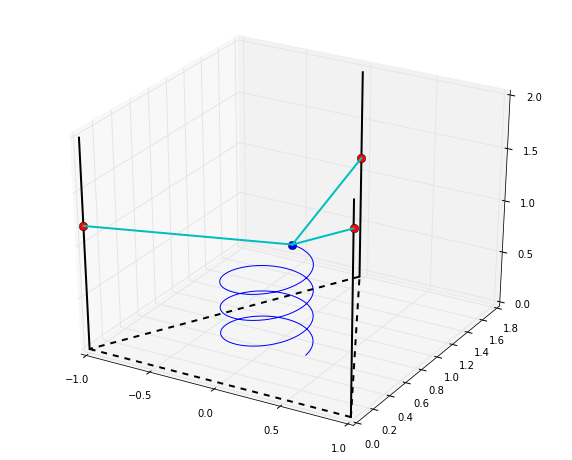

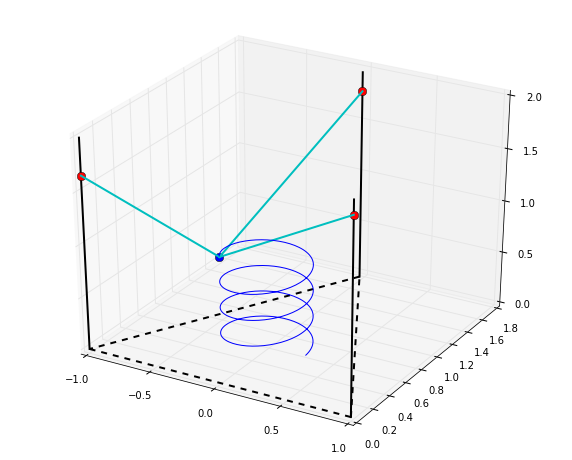

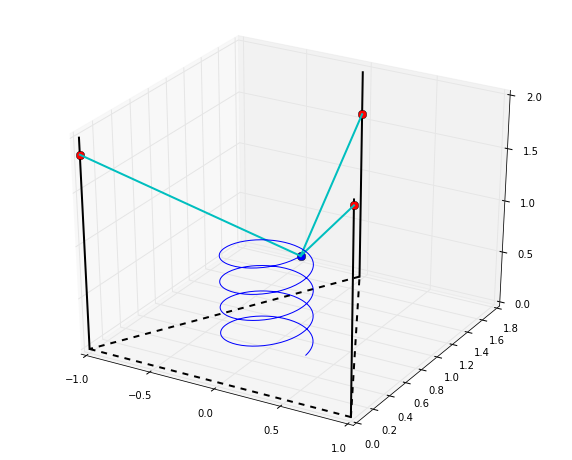

In [21]:
L = 1
for k in range(0,400,36):
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca(projection='3d')
    plot_triangles(L)
    plot_elements(L, h1_vec[k], h2_vec[k], h3_vec[k], x_vec[k], y_vec[k], z_vec[k])
    ax.plot(x_vec[0:k], y_vec[0:k], z_vec[0:k], 'b')
    ax.auto_scale_xyz([-1, 1], [0, np.sqrt(3)], [0, 2])
    
plt.show()